# Gradient Descent Algorithm

The idea is to implement algorithm to estimate parameters by minimizing a cost function using the gradient descent algorithm.

First let's implement for a simple linear regression:
\begin{align}
\ y_i = \alpha + \beta*x_i
\end{align}

Cost Function:

\begin{align}
\ J = \frac{1}{n}\sum_{i=1}^n[y_i - (\alpha + \beta*x_i)]^2
\end{align}


Gradient:
\begin{align}
\ \nabla J(\alpha,\beta) = (\frac{dE}{d\alpha},\frac{dE}{d\beta})
\end{align}

\begin{align}
\ \frac{dJ}{d\alpha} = \frac{2}{n}[\sum_{i=1}^n(-y_i) + n\alpha + \beta\sum_{i=1}^nx_i]
\end{align}

\begin{align}
\ \frac{dJ}{d\beta} = \frac{2}{n}[\sum_{i=1}^n(-y_i*x_i) + \alpha\sum_{i=1}^nx_i + \beta\sum_{i=1}^nx_i^2]
\end{align}

In [160]:
# Create function to calculate the gradient for a given alpha and beta
grad <- function(y,x,alpha,beta){
    n = length(x)
    d_alpha = (2/n)*(sum(-y)+n*alpha+beta*sum(x))
    d_beta = (2/n)*(sum(-x*y)+alpha*sum(x)+beta*sum(x^2))
    return(list(alpha=d_alpha,beta=d_beta))
}

In [161]:
# Cost function
cost <- function(y,x,alpha,beta){
    n = length(x)
    (1/n)*sum((y - (alpha+x*beta))^2)
}

In [166]:
estimate<-function(y,x,initial_parameters=list(alpha=0,beta=0),learning_rate,maxit=1000,conv=0.001){
    for(i in 1:maxit){
        result<-grad(y,x,initial_parameters$alpha,initial_parameters$beta)
        new_alpha = initial_parameters$alpha - learning_rate*result$alpha
        new_beta = initial_parameters$beta - learning_rate*result$beta
        diff=cost(y,x,initial_parameters$alpha,initial_parameters$beta)-cost(y,x,new_alpha,new_beta)
        initial_parameters = list(alpha=new_alpha,beta=new_beta)
        #print(diff)
        if(abs(diff)<=conv){
            print("Converged")
            break
        }
    }
    return(list(parameters=list(alpha=new_alpha,beta=new_beta),interations=i,difference=diff))
}

In [163]:
x<-runif(100,0,10)
y<-3.2-1.7*x+rnorm(length(x),0,1)

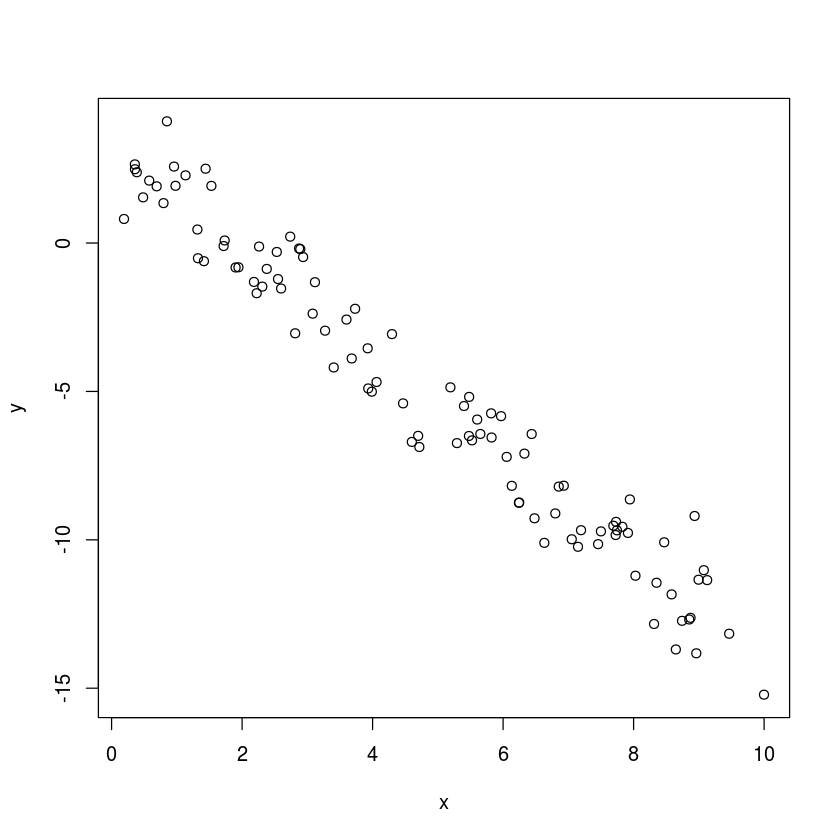

In [164]:
plot(x,y)

In [167]:
test<-estimate(y,x,initial_parameters=list(alpha=0,beta=0),learning_rate=0.01,maxit=3000,conv=10e-15)

[1] "Converged"


In [168]:
test$parameters

$alpha
[1] 3.117857

$beta
[1] -1.718864

In [169]:
test$interations

[1] 2911

In [170]:
summary(lm(y~x))


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.97955 -0.75794 -0.03749  0.77573  3.04354 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.11786    0.21552   14.47   <2e-16 ***
x           -1.71886    0.03865  -44.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.08 on 98 degrees of freedom
Multiple R-squared:  0.9528,	Adjusted R-squared:  0.9523 
F-statistic:  1978 on 1 and 98 DF,  p-value: < 2.2e-16
